This example loads the AT map, unscrambles it, and plots the results

In [1]:
%matplotlib inline

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy
from read_shapefile import CenterLine
import numpy as np

In [6]:
def plotSeg(seg):
    if len(seg)>1:
        for s in seg:
            plt.plot(s["POINTS"][:,0], s["POINTS"][:,1])
    else:
        plt.plot(seg["POINTS"][:,0], seg["POINTS"][:,1])
        
        
def plotMap(line):
    plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
    # Plot AT centerline
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    
    ax.set_extent([-88, -66.5, 20, 50]) # US East Coast
    
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.RIVERS)
    
    shapename = 'admin_1_states_provinces_lakes_shp'
    states_shp = shpreader.natural_earth(resolution='110m',
                                             category='cultural', name=shapename)
    # convert to Shapely type
    track = sgeom.LineString(line)
    for state in shpreader.Reader(states_shp).geometries():
        # pick a default color for the land with a black outline,
        # this will change if the storm intersects with our track
        facecolor = [0.9375, 0.9375, 0.859375]
        edgecolor = 'black'
        if state.intersects(track):
            facecolor = [0.9, 0.9, 0.92]
        ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
    
    # Plot AT Course
    ax.add_geometries([track], ccrs.PlateCarree(),facecolor='none', edgecolor='red', linewidth=2)

    # # Show Springer and Katahdin
    # # Coords of springer: 34.6272° N, 84.1939° W
    # # Coords of Katahdin: 45.9044° N, 68.9216° W
    # plt.plot([-84.1939],[34.6272], 'bo', [-68.9216],[45.9044], 'bo')  
    

In [3]:
shapefile_name = "../testdata/AT_Centerline_12-23-2014/at_centerline"
cLine = CenterLine(shapefile_name)
npts = len(cLine.data)  

print "Number of records: " + str(npts)
    
segBegins = np.zeros([npts,2])
totalLen = 0.0
for (i,s) in enumerate(cLine.data):
    segBegins[i,:] = s["POINTS"][0,:]
    totalLen += float(s["2D_Miles"])

Number of records: 3347


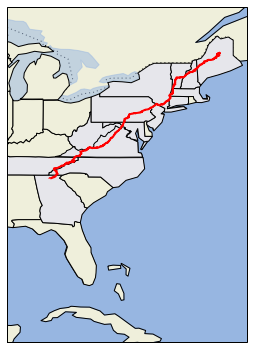

In [7]:
plotMap(segBegins)
